<a href="https://colab.research.google.com/github/Ibrah-N/University-Study/blob/main/Ibrhaim_BSDS_A_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment : 01
- Title           : End-To-End Pipelining
- Submitted By    : Ibrahim
- Submitted To    : Prof Adnan Amin
- SubmissionDate  : 20-April-2025


# Assignments Task List
  1. Download Dataset
  2. Understand The Dataset
  3. Data Preprocessing
    - 3.1 Data Analysis
    - 3.2 Data Visualization
  4. Model Building Without Feature Engineering
  5. Apply Feature Engineering & Balancing Technique
  6. Retrain The Same Models


# Assignment Tasks

### Given Preprocessing Script

In [ ]:
import mne
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
from Seizure_times import *
import numpy as np
from sklearn.model_selection import train_test_split
import collections
import os

CPS_seizures = []
elec_seizures = []
visual_seizures = []
noc_seizures = []
normals = []
labels = []
index_vect = []

for patient in [15, 14, 13, 12, 11, 10]:

    if patient == 10:
        files_list=["Record1.edf","Record2.edf"]
    elif patient in (15, 13, 11):
        files_list=["Record1.edf","Record2.edf","Record3.edf","Record4.edf"]
    elif patient in (14, 12):
        files_list=["Record1.edf","Record2.edf","Record3.edf"]


    for file_id, file in enumerate(files_list):
        file=os.path.join("./edfs", "p"+str(patient)+"_"+file)
        data = mne.io.read_raw_edf(file, preload=True)

        seizure_record = []
        index_mat = np.array([0,0])
        ###################### Ordering channels ######################
        if patient in (15, 14, 13, 12, 11):
            data.drop_channels(['EEG Cz-Ref', 'EEG Pz-Ref', 'ECG EKG', 'Manual']) # see attached word file for details
        elif patient == 10:
            data.reorder_channels(['EEG Fp2-Ref', 'EEG Fp1-Ref', 'EEG F8-Ref', 'EEG F4-Ref', 'EEG Fz-Ref', 'EEG F3-Ref', 'EEG F7-Ref', 'EEG A2-Ref', 'EEG T4-Ref', 'EEG C4-Ref', 'EEG C3-Ref', 'EEG T3-Ref', 'EEG A1-Ref', 'EEG T6-Ref', 'EEG P4-Ref', 'EEG P3-Ref', 'EEG T5-Ref', 'EEG O2-Ref', 'EEG O1-Ref'])
        print('#'*150)
        print('#'*150)
        print('#'*150)
        #print(data.info["ch_names"])
        print('#'*150)
        print('#'*150)
        print('#'*150)
        raw_data = data.get_data()      # ndarray 19 x ~5M
        raw_data = np.array(raw_data)
        print(raw_data.shape)
        print('#'*150)
        print('#'*150)
        print('#'*150)
        ###################################################
        record_time = data.info['meas_date']
        record_time = record_time.time()  #File time onset
        record_time = datetime.combine(date.today(), record_time)
        # get seizure time and duration

        r = 'seizures_' + str(patient)
        for i in  range(len(eval(r)[file_id+1])):  #file_id correspond to record number so here we are checking how many
            # seizures inside a specific record
            s_time = time(eval(r)[file_id+1][i][0], eval(r)[file_id+1][i][1], eval(r)[file_id+1][i][2])
            seizure_duration = eval(r)[file_id+1][i][3]

            print('*'*150)
            print("File ID: {}, Record time:{}, Seizure time: {}, Seizure duration: {}".format('patient_' + str(patient) + '_Record'+str(file_id+1)+'_sz'+str(i+1), record_time, s_time, seizure_duration))
            print('*'*150)
            print('*'*150)
            print('*'*150)
            diff = datetime.combine(date.today(), s_time) - record_time # assigned date does not matter
            s_index = int( diff.total_seconds() * 500 ) # 500 sampling rate,
            #s_index: seizure start in samples
            s_index_end = s_index + int(seizure_duration * 500)
            #s_index_end: seizure end in sample
            point_duration = 1  # how many seconds is one point
            #print(diff.days)
            #print(diff.seconds)
            #print(s_index)
            #print(s_index_end)
            print('*'*150)
            print('*'*150)
            print('*'*150)

            # get seizure index

            st = raw_data[:, s_index:s_index_end]

            index_mat = np.vstack([index_mat,[s_index,s_index_end]])

            print(index_mat)

            if seizure_record == []:
                seizure_record = st
            else:
                seizure_record = np.concatenate((seizure_record,st),axis=1)
                #for patient 10, record2, the seizure is 305 sec, 305*500 = 152500

            if len(index_mat) == 2:
                normal_record = np.delete(raw_data, np.s_[index_mat[1,0]:index_mat[1,1]], axis=1) # remove all data corresponding to a seizure


            elif len(index_mat) == 3:
                x1 = np.linspace(index_mat[1,0], index_mat[1,1], index_mat[1,1]-index_mat[1,0]+1, endpoint=True)
                x2 = np.linspace(index_mat[2,0], index_mat[2,1], index_mat[2,1]-index_mat[2,0]+1, endpoint=True)
                y = np.concatenate((x1,x2))
                normal_record = np.delete(raw_data, np.s_[y], axis=1)

            elif len(index_mat) == 4:
                x1 = np.linspace(index_mat[1,0], index_mat[1,1], index_mat[1,1]-index_mat[1,0]+1, endpoint=True)
                x2 = np.linspace(index_mat[2,0], index_mat[2,1], index_mat[2,1]-index_mat[2,0]+1, endpoint=True)
                x3 = np.linspace(index_mat[3,0], index_mat[3,1], index_mat[3,1]-index_mat[2,0]+1, endpoint=True)
                y = np.concatenate((x1,x2,x3))
                normal_record = np.delete(raw_data, np.s_[y], axis=1)

            elif len(index_mat) == 5:
                x1 = np.linspace(index_mat[1,0], index_mat[1,1], index_mat[1,1]-index_mat[1,0]+1, endpoint=True)
                x2 = np.linspace(index_mat[2,0], index_mat[2,1], index_mat[2,1]-index_mat[2,0]+1, endpoint=True)
                x3 = np.linspace(index_mat[3,0], index_mat[3,1], index_mat[3,1]-index_mat[2,0]+1, endpoint=True)
                x4 = np.linspace(index_mat[4,0], index_mat[4,1], index_mat[4,1]-index_mat[2,0]+1, endpoint=True)
                y = np.concatenate((x1,x2,x3,x4))
                normal_record = np.delete(raw_data, np.s_[y], axis=1)

            print(seizure_record.shape)
            print('*'*150)
            print('*'*150)
            print('*'*150)

            if patient == 10:
                for i in range(seizure_duration):
                    data_point = seizure_record[:, i * 500:(i + 1) * 500]  #this will be 19x500
                    elec_seizures.append(data_point)  # this will a list of for example 305 matrix of size 19x500
            elif patient ==13 and file_id<3:
                for i in range(seizure_duration):
                    data_point = seizure_record[:, i * 500:(i + 1) * 500]  #this will be 19x500
                    noc_seizures.append(data_point)  # this will a list of for example 305 matrix of size 19x500
            else:
                for i in range(seizure_duration):           # i is the one second interval
                    data_point = seizure_record[:, i*500:(i+1)*500]
                    CPS_seizures.append(data_point)         # CPS is set of points, each of which is 19x500

            # normals
            for i in range(seizure_duration): #take same number of normal points
                data_point = normal_record[:, i*500:(i+1)*500]
                normals.append(data_point)


# transpose second and third dim
CPS_seizures = np.array(CPS_seizures)
scaler = np.amax(abs(CPS_seizures))
CPS_seizures = CPS_seizures/scaler

elec_seizures = np.array(elec_seizures)
scaler = np.amax(abs(elec_seizures))
elec_seizures = elec_seizures/scaler

noc_seizures = np.array(noc_seizures)
scaler = np.amax(abs(noc_seizures))
noc_seizures = noc_seizures/scaler

normals = np.array(normals)
scaler = np.amax(abs(normals))
normals = normals/scaler

# plt.figure('Normal')
# plt.plot(normals[100].T)
# plt.figure('Seizure')
# plt.plot(seizures[100].T)
# plt.show()
#

x = np.vstack((noc_seizures, elec_seizures, CPS_seizures, normals)) #trying to construct the x #points x 19 x 500

# below order matters
labels.extend([3 for i in range(len(noc_seizures))])
labels.extend([2 for i in range(len(elec_seizures))])
labels.extend([1 for i in range(len(CPS_seizures))])
labels.extend([0 for i in range(len(normals))])

x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.1, random_state=1)

np.save("./data_aligned/x_train", x_train)
np.save("./data_aligned/x_test", x_test)
np.save("./data_aligned/y_train", y_train)
np.save("./data_aligned/y_test", y_test)

##############################################################################
import numpy as np
import scipy.io
matrix = np.load('./data_aligned/x_test.npy')
scipy.io.savemat('./data_aligned/x_test.mat', dict(x_test=matrix))
##############################################################################
matrix2 = np.load('./data_aligned/x_train.npy')
scipy.io.savemat('./data_aligned/x_train.mat', dict(x_train=matrix2))
##############################################################################
matrixy = np.load('./data_aligned/y_test.npy')
scipy.io.savemat('./data_aligned/y_test.mat', dict(y_test=matrixy))
##############################################################################
matrixy2 = np.load('./data_aligned/y_train.npy')
scipy.io.savemat('./data_aligned/y_train.mat', dict(y_train=matrixy2))

## Preparing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
import numpy as np
from scipy.io import loadmat
import pandas as pd
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# copy the data from drive to local folder
!cp -r /content/drive/MyDrive/data_aligned /content/

print(os.listdir("/content/data_aligned/"))

['x_test.npy', 'x_train.npy', 'y_train.npy', 'y_test.npy', 'x_test.mat', 'x_train.mat', 'y_test.mat', 'y_train.mat']


In [ ]:
# load the processed data

x_train = np.load("/content/data_aligned/x_train.npy")
y_train = np.load("/content/data_aligned/y_train.npy")
x_test = np.load("/content/data_aligned/x_test.npy")
y_test = np.load("/content/data_aligned/y_test.npy")

In [ ]:
x_train.shape

(6232, 19, 500)

np.int32(1)

In [ ]:
# Allocate 10% of train data to validation set
x_val = x_train[-701:,:,:]
y_val = y_train[-701:]
x_train = x_train[:-701,:,:]
y_train = y_train[:-701]

In [ ]:
# Print shapes of train, validation, and test sets
print(f'x_train shape:{x_train.shape},\
      \ny_train shape:{y_train.shape},\
      \nx_val shape:{x_val.shape},\
      \ny_val shape:{y_val.shape},\
      \nx_test shape:{x_test.shape},\
      \ny_test shape:{y_test.shape}\n')

# List the classes that exist within the dataset
print(f'Classes: {np.unique(y_train)}')
print('Seizure Types: \n1: for Complex Partial Seizures, 2: for Electrographic Seizures,\
       \n3: for Video-detected Seizures with no visual change over EEG, 0: for Normal data')

x_train shape:(5531, 19, 500),      
y_train shape:(5531,),      
x_val shape:(701, 19, 500),      
y_val shape:(701,),      
x_test shape:(1558, 19, 500),      
y_test shape:(1558,)

Classes: [0 1 2 3]
Seizure Types: 
1: for Complex Partial Seizures, 2: for Electrographic Seizures,       
3: for Video-detected Seizures with no visual change over EEG, 0: for Normal data


## Models

### Model : LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout,Normalization,BatchNormalization,LayerNormalization
from tensorflow.keras.layers import LSTM,GRU,Embedding,Reshape
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam,Adamax
from tensorflow.keras.regularizers import l1,l2

In [ ]:
# Build the neural network model

tf.random.set_seed(1234)                                   # For consistent results

model = Sequential([
    Input((x_train.shape[1],x_train.shape[2],1)),          # Input layer for EEG data: (electrodes, time points, channels)

    Conv2D(8, (1,250), activation='relu', padding='same'), # Kernel length set to half the sampling rate of the data
    BatchNormalization(),                                  # Normalize activations to stabilize training
    AveragePooling2D((1,4)),                               # Downsample feature maps to reduce computational complexity and prevent overfitting
    Dropout(0.2),                                          # Include dropout to prevent overfitting

    Conv2D(16,(1,62), activation='relu', padding='same'),  # Additional convolutional layers to capture hierarchical features
    BatchNormalization(),
    AveragePooling2D((1,2)),
    Dropout(0.2),

    Conv2D(32,(1,31), activation='relu', padding='same'),
    BatchNormalization(),
    AveragePooling2D((1,2)),
    Dropout(0.2),

    Reshape((x_train.shape[1],-1)),                        # Reshape to prepare for LSTM layer
    LSTM(128, activation='tanh'),

    Dense(4)
])

In [ ]:
# Compile and fit the model

model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adamax(0.001),
    metrics = ['accuracy']
)

model.fit(
    x_train,y_train,
    epochs = 20,
    verbose = 1,
    validation_data=(x_val,y_val)
)

train_loss, train_accuracy = model.evaluate(x_train, y_train)
val_loss, val_accuracy = model.evaluate(x_val, y_val)
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Train Loss: {train_loss:.2f}, Validation Loss: {val_loss:.2f},  Test Loss: {test_loss:.2f}')
print(f'Train Accuracy: {train_accuracy*100:.2f}%, Validation Accuracy: {val_accuracy*100:.2f}%, Test Accuracy: {test_accuracy*100:.2f}%')

Epoch 1/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.6876 - loss: 0.8082 - val_accuracy: 0.4950 - val_loss: 1.3881
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8105 - loss: 0.5152 - val_accuracy: 0.1170 - val_loss: 1.4843
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8619 - loss: 0.3769 - val_accuracy: 0.4051 - val_loss: 1.1780
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8926 - loss: 0.2961 - val_accuracy: 0.4351 - val_loss: 1.3384
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9033 - loss: 0.2511 - val_accuracy: 0.8673 - val_loss: 0.3206
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9202 - loss: 0.2141 - val_accuracy: 0.8930 - val_loss: 0.2628
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9255 - loss: 0.1860 - val_accuracy: 0.8830 - val_loss: 0.2698
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9396 - loss: 0.1574 - val_ac

In [ ]:
## Saving the model weights and archeture
model.save("model_01.h5")

### Model 2: 1D CNN + GRU Hybrid

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D

model2 = Sequential([
    Input((x_train.shape[1], x_train.shape[2])),

    Conv1D(64, kernel_size=7, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(128, kernel_size=5, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    GRU(64, return_sequences=False),
    Dense(4)
])


In [ ]:
model2.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.001),
    metrics=['accuracy']
)

model2.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    verbose=1
)

Epoch 1/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6451 - loss: 0.9069 - val_accuracy: 0.5321 - val_loss: 1.0220
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7392 - loss: 0.6580 - val_accuracy: 0.6605 - val_loss: 0.8256
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7890 - loss: 0.5506 - val_accuracy: 0.7532 - val_loss: 0.5993
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8346 - loss: 0.4494 - val_accuracy: 0.8074 - val_loss: 0.5040
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8605 - loss: 0.3911 - val_accuracy: 0.8245 - val_loss: 0.5034
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8770 - loss: 0.3364 - val_accuracy: 0.8245 - val_loss: 0.5219
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8868 - loss: 0.3004 - val_accuracy: 0.8060 - val_loss: 0.5692
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9025 - loss: 0.2686 - val_accura

In [ ]:
## saving the models
model2.save("model_02.h5")

### Model 3: Transformer-style Attention Model

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Add

input_layer = Input(shape=(x_train.shape[1], x_train.shape[2]))

# Positional Encoding not added for simplicity – you can try later
attn_output = MultiHeadAttention(num_heads=4, key_dim=32)(input_layer, input_layer)
attn_output = Dropout(0.2)(attn_output)
attn_output = Add()([input_layer, attn_output])  # Residual Connection
attn_output = LayerNormalization()(attn_output)

# Feed Forward Network
ffn = Dense(128, activation='relu')(attn_output)
ffn = Dropout(0.3)(ffn)
ffn = Dense(64, activation='relu')(ffn)
ffn = Dropout(0.2)(ffn)

flattened = Flatten()(ffn)
output_layer = Dense(4)(flattened)

model3 = tf.keras.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model3.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.001),
    metrics=['accuracy']
)

model3.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    verbose=1
)

Epoch 1/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.6271 - loss: 0.8641 - val_accuracy: 0.7989 - val_loss: 0.5117
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8009 - loss: 0.5110 - val_accuracy: 0.8345 - val_loss: 0.4511
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8387 - loss: 0.4382 - val_accuracy: 0.8359 - val_loss: 0.4487
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8581 - loss: 0.4031 - val_accuracy: 0.8488 - val_loss: 0.4181
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8582 - loss: 0.3658 - val_accuracy: 0.8459 - val_loss: 0.4188
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8573 - loss: 0.3726 - val_accuracy: 0.8631 - val_loss: 0.3813
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8838 - loss: 0.3202 - val_accuracy: 0.8545 - val_loss: 0.4021
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8765 - loss: 0.3311 - val_accuracy: 

In [ ]:
## saving the model
model3.save("model3.h5")

## Evaluation Of Models

### Model : LSTM

In [ ]:
# Evaluate the model with other metrics

# Train data
y_train_predict_ = model.predict(x_train)
y_train_predict = np.argmax(tf.nn.softmax(y_train_predict_), axis=1)

# Test data
y_test_predict_ = model.predict(x_test)
y_test_predict = np.argmax(tf.nn.softmax(y_test_predict_), axis=1)

# Define the metrics and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_values = [accuracy_score(y_train, y_train_predict) * 100,
                precision_score(y_train, y_train_predict, average='macro') * 100,
                recall_score(y_train, y_train_predict, average='macro') * 100,
                f1_score(y_train, y_train_predict, average='macro') * 100]
test_values = [accuracy_score(y_test, y_test_predict) * 100,
               precision_score(y_test, y_test_predict, average='macro') * 100,
               recall_score(y_test, y_test_predict, average='macro') * 100,
               f1_score(y_test, y_test_predict, average='macro') * 100]

# Create DataFrame
results_df = pd.DataFrame({
    'Metric:': metrics,
    'Train:': train_values,
    'Test:': test_values
})



# Print DataFrame
print("\nTrain and Test Data Results -")
print(results_df.round(2).to_string(index=False))

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Train and Test Data Results -
  Metric:  Train:  Test:
 Accuracy   97.43  93.07
Precision   97.85  94.63
   Recall   98.02  92.85
 F1 Score   97.90  93.62


### Model 2: 1D CNN + GRU Hybrid

In [ ]:
# Evaluate the model with other metrics

# Train data
y_train_predict_ = model2.predict(x_train)
y_train_predict = np.argmax(tf.nn.softmax(y_train_predict_), axis=1)

# Test data
y_test_predict_ = model2.predict(x_test)
y_test_predict = np.argmax(tf.nn.softmax(y_test_predict_), axis=1)

# Define the metrics and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_values = [accuracy_score(y_train, y_train_predict) * 100,
                precision_score(y_train, y_train_predict, average='macro') * 100,
                recall_score(y_train, y_train_predict, average='macro') * 100,
                f1_score(y_train, y_train_predict, average='macro') * 100]
test_values = [accuracy_score(y_test, y_test_predict) * 100,
               precision_score(y_test, y_test_predict, average='macro') * 100,
               recall_score(y_test, y_test_predict, average='macro') * 100,
               f1_score(y_test, y_test_predict, average='macro') * 100]

# Create DataFrame
results_df = pd.DataFrame({
    'Metric:': metrics,
    'Train:': train_values,
    'Test:': test_values
})



# Print DataFrame
print("\nTrain and Test Data Results -")
print(results_df.round(2).to_string(index=False))

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Train and Test Data Results -
  Metric:  Train:  Test:
 Accuracy   94.12  84.53
Precision   92.99  85.39
   Recall   89.58  71.83
 F1 Score   90.49  73.87


### Model 3: Transformer-style Attention Model

In [ ]:
# Evaluate the model with other metrics

# Train data
y_train_predict_ = model3.predict(x_train)
y_train_predict = np.argmax(tf.nn.softmax(y_train_predict_), axis=1)

# Test data
y_test_predict_ = model3.predict(x_test)
y_test_predict = np.argmax(tf.nn.softmax(y_test_predict_), axis=1)

# Define the metrics and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_values = [accuracy_score(y_train, y_train_predict) * 100,
                precision_score(y_train, y_train_predict, average='macro') * 100,
                recall_score(y_train, y_train_predict, average='macro') * 100,
                f1_score(y_train, y_train_predict, average='macro') * 100]
test_values = [accuracy_score(y_test, y_test_predict) * 100,
               precision_score(y_test, y_test_predict, average='macro') * 100,
               recall_score(y_test, y_test_predict, average='macro') * 100,
               f1_score(y_test, y_test_predict, average='macro') * 100]

# Create DataFrame
results_df = pd.DataFrame({
    'Metric:': metrics,
    'Train:': train_values,
    'Test:': test_values
})



# Print DataFrame
print("\nTrain and Test Data Results -")
print(results_df.round(2).to_string(index=False))

173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

Train and Test Data Results -
  Metric:  Train:  Test:
 Accuracy   92.95  86.39
Precision   94.36  88.94
   Recall   94.64  80.66
 F1 Score   94.42  83.69


## Preprocessing & EDA

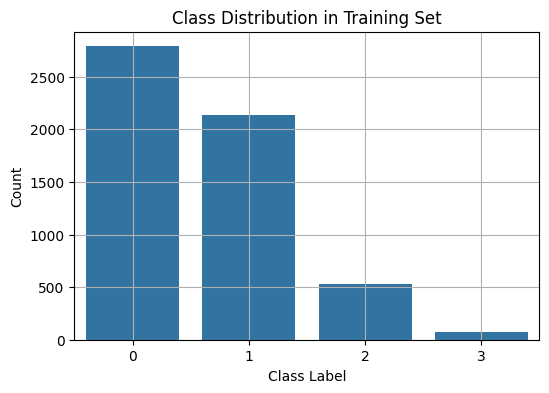

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Insight: Tells if the dataset is imbalanced. If one class dominates, it could cause model bias.

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.grid(True)
plt.savefig("class_distribution.png")
plt.show()

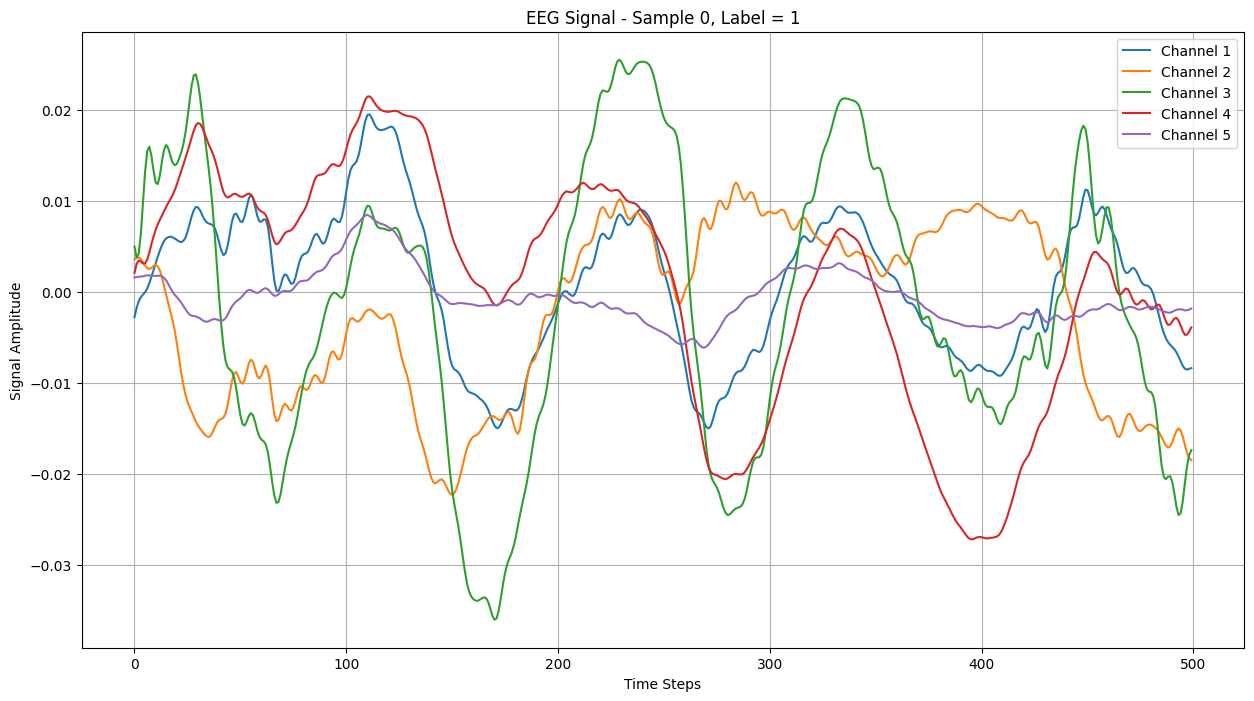

In [ ]:
'''
Insight:
  - Rapid fluctuations show active brain states.
  - Flat or low variation might indicate rest or noise.
  - Sudden spikes could be eye blinks, muscle movement, or epileptic spikes.
'''

def plot_eeg_signals(x_data, y_data, sample_idx=0, channels=5):
    plt.figure(figsize=(15, 8))
    for i in range(channels):
        plt.plot(x_data[sample_idx, i, :], label=f'Channel {i+1}')
    plt.title(f"EEG Signal - Sample {sample_idx}, Label = {y_data[sample_idx]}")
    plt.xlabel("Time Steps")
    plt.ylabel("Signal Amplitude")
    plt.legend()
    plt.grid(True)
    plt.savefig("EEG Signal.png")
    plt.show()

# Plot one sample
plot_eeg_signals(x_train, y_train, sample_idx=0, channels=5)

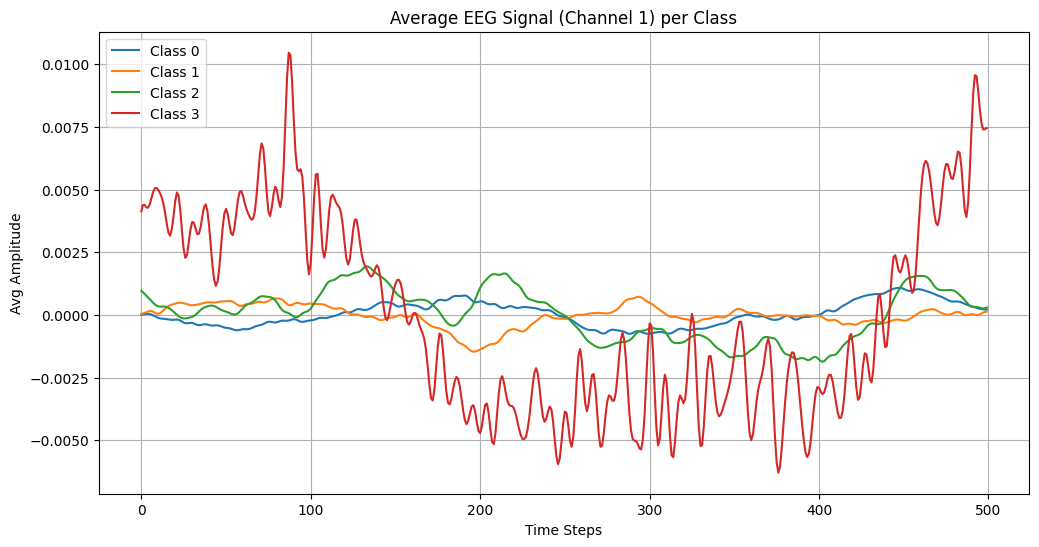

In [ ]:
'''
Comparison across classes:
  - Helps visualize differences in brain activity between tasks.
  - Useful for seeing if classes are separable via signal shape.
'''

def plot_avg_signals_per_class(x_data, y_data, class_labels, channel=0):
    plt.figure(figsize=(12, 6))
    for c in class_labels:
        class_signals = x_data[y_data == c, channel, :]
        mean_signal = class_signals.mean(axis=0)
        plt.plot(mean_signal, label=f'Class {c}')
    plt.title(f"Average EEG Signal (Channel {channel+1}) per Class")
    plt.xlabel("Time Steps")
    plt.ylabel("Avg Amplitude")
    plt.legend()
    plt.grid(True)
    plt.savefig("Average EEG Signal per Class.png")
    plt.show()

# Plot for first channel
plot_avg_signals_per_class(x_train, y_train, np.unique(y_train), channel=0)

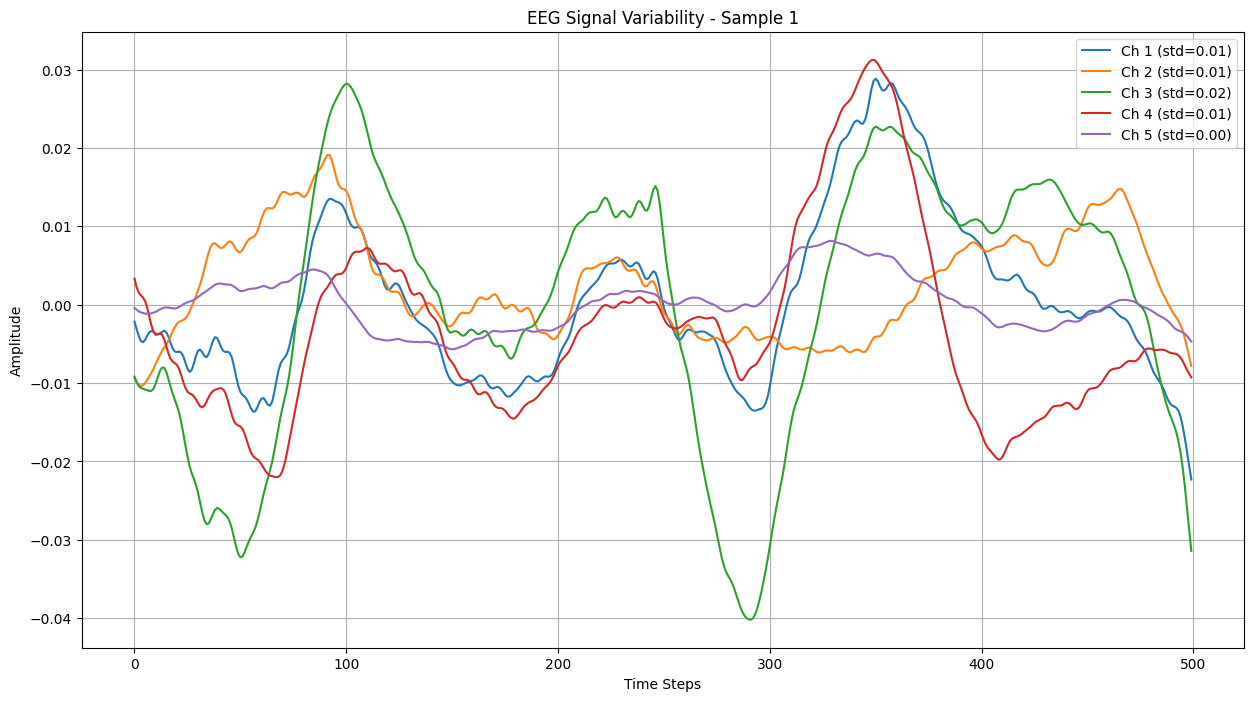

In [ ]:
'''
Highlight: The standard deviation (std) in the label shows how dynamic that signal is.
Higher std = more brain activity, possibly related to movement or cognitive load.
Low std = may suggest rest, artifacts, or less information.
'''

def plot_signal_variability(x_data, sample_idx=0, channels=5):
    plt.figure(figsize=(15, 8))
    for i in range(channels):
        signal = x_data[sample_idx, i, :]
        plt.plot(signal, label=f'Ch {i+1} (std={signal.std():.2f})')
    plt.title(f"EEG Signal Variability - Sample {sample_idx}")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.savefig("EEG Signal Variability.png")
    plt.show()

plot_signal_variability(x_train, sample_idx=1, channels=5)

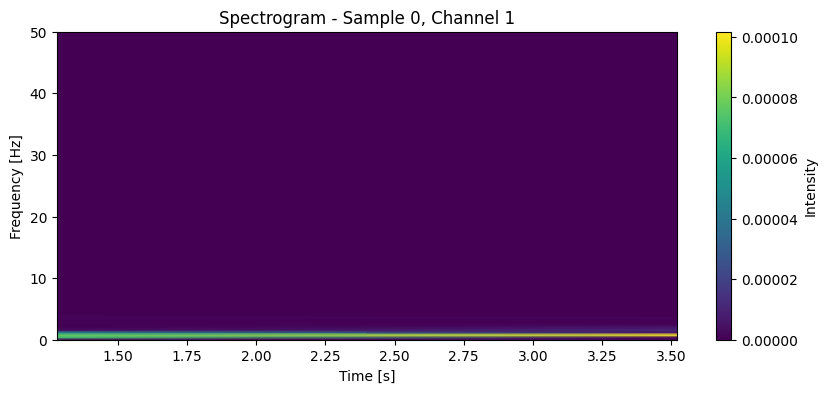

In [ ]:
'''
Delta (0.5–4 Hz): Deep sleep
Theta (4–8 Hz): Drowsiness
Alpha (8–13 Hz): Relaxation
Beta (13–30 Hz): Focused activity
Gamma (>30 Hz): High-level cognition
Color: Power (intensity) of each frequency at that time
'''



from scipy.signal import spectrogram

def plot_spectrogram(x_data, sample_idx=0, channel=0):
    f, t, Sxx = spectrogram(x_data[sample_idx, channel, :], fs=100)
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.title(f"Spectrogram - Sample {sample_idx}, Channel {channel+1}")
    plt.colorbar(label='Intensity')
    plt.savefig("Spectrogram.png")
    plt.show()

plot_spectrogram(x_train, sample_idx=0, channel=0)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# === STEP 1: Basic Input Reshape ===
# Assuming each sample is (9500,) and EEG data is 19 electrodes × 500 time points
x_train = x_train.reshape(-1, 19, 500)
x_val = x_val.reshape(-1, 19, 500)
x_test = x_test.reshape(-1, 19, 500)

# === STEP 2: Normalize per electrode across time ===
# Flatten for scaling, scale per electrode
def scale_eeg(data):
    scaled = []
    for sample in data:
        scaler = StandardScaler()
        scaled_sample = scaler.fit_transform(sample.T).T  # transpose to scale time-points per electrode
        scaled.append(scaled_sample)
    return np.array(scaled)

x_train_scaled = scale_eeg(x_train)
x_val_scaled = scale_eeg(x_val)
x_test_scaled = scale_eeg(x_test)

# === STEP 3: Add channel dimension ===
x_train_scaled = x_train_scaled[..., np.newaxis]  # shape: (N, 19, 500, 1)
x_val_scaled = x_val_scaled[..., np.newaxis]
x_test_scaled = x_test_scaled[..., np.newaxis]

# === STEP 4: Class weights (if imbalanced) ===
classes = np.unique(y_train)
class_weights = dict(zip(
    classes,
    compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
))

# Ready to plug into CNN-LSTM model now
print("Preprocessing done ✅")
print("x_train shape:", x_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("Class weights:", class_weights)
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# === STEP 1: Basic Input Reshape ===
# Assuming each sample is (9500,) and EEG data is 19 electrodes × 500 time points
x_train = x_train.reshape(-1, 19, 500)
x_val = x_val.reshape(-1, 19, 500)
x_test = x_test.reshape(-1, 19, 500)

# === STEP 2: Normalize per electrode across time ===
# Flatten for scaling, scale per electrode
def scale_eeg(data):
    scaled = []
    for sample in data:
        scaler = StandardScaler()
        scaled_sample = scaler.fit_transform(sample.T).T  # transpose to scale time-points per electrode
        scaled.append(scaled_sample)
    return np.array(scaled)

x_train_scaled = scale_eeg(x_train)
x_val_scaled = scale_eeg(x_val)
x_test_scaled = scale_eeg(x_test)

# === STEP 3: Add channel dimension ===
x_train_scaled = x_train_scaled[..., np.newaxis]  # shape: (N, 19, 500, 1)
x_val_scaled = x_val_scaled[..., np.newaxis]
x_test_scaled = x_test_scaled[..., np.newaxis]

# === STEP 4: Class weights (if imbalanced) ===
classes = np.unique(y_train)
class_weights = dict(zip(
    classes,
    compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
))

# Ready to plug into CNN-LSTM model now
print("Preprocessing done ✅")
print("x_train shape:", x_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("Class weights:", class_weights)

Preprocessing done ✅
x_train shape: (5531, 19, 500, 1)
y_train shape: (5531,)
Class weights: {np.int32(0): np.float64(0.4959648493543759), np.int32(1): np.float64(0.6473548689138576), np.int32(2): np.float64(2.599154135338346), np.int32(3): np.float64(18.436666666666667)}
Preprocessing done ✅
x_train shape: (5531, 19, 500, 1)
y_train shape: (5531,)
Class weights: {np.int32(0): np.float64(0.4959648493543759), np.int32(1): np.float64(0.6473548689138576), np.int32(2): np.float64(2.599154135338346), np.int32(3): np.float64(18.436666666666667)}


## Model Training After Preprocessing

### LSTM

In [ ]:
# Build the neural network model

tf.random.set_seed(1234)                                   # For consistent results

model = Sequential([
    Input((x_train.shape[1],x_train.shape[2],1)),          # Input layer for EEG data: (electrodes, time points, channels)

    Conv2D(8, (1,250), activation='relu', padding='same'), # Kernel length set to half the sampling rate of the data
    BatchNormalization(),                                  # Normalize activations to stabilize training
    AveragePooling2D((1,4)),                               # Downsample feature maps to reduce computational complexity and prevent overfitting
    Dropout(0.2),                                          # Include dropout to prevent overfitting

    Conv2D(16,(1,62), activation='relu', padding='same'),  # Additional convolutional layers to capture hierarchical features
    BatchNormalization(),
    AveragePooling2D((1,2)),
    Dropout(0.2),

    Conv2D(32,(1,31), activation='relu', padding='same'),
    BatchNormalization(),
    AveragePooling2D((1,2)),
    Dropout(0.2),

    Reshape((x_train.shape[1],-1)),                        # Reshape to prepare for LSTM layer
    LSTM(128, activation='tanh'),

    Dense(4)
])

In [ ]:
# Compile and fit the model

model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adamax(0.001),
    metrics = ['accuracy']
)

# Train the model
history = model.fit(
    x_train_scaled, y_train,
    validation_data=(x_val_scaled, y_val),
    epochs=20,
    batch_size=32,
    class_weight=class_weights,
    verbose=1
)


# Use reshaped/scaled inputs for evaluation
train_loss, train_accuracy = model.evaluate(x_train_scaled, y_train)
val_loss, val_accuracy = model.evaluate(x_val_scaled, y_val)
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)

print(f'Train Loss: {train_loss:.2f}, Validation Loss: {val_loss:.2f},  Test Loss: {test_loss:.2f}')
print(f'Train Accuracy: {train_accuracy*100:.2f}%, Validation Accuracy: {val_accuracy*100:.2f}%, Test Accuracy: {test_accuracy*100:.2f}%')


Epoch 1/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9329 - loss: 0.1416 - val_accuracy: 0.7432 - val_loss: 0.8938
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9801 - loss: 0.0557 - val_accuracy: 0.7418 - val_loss: 0.8817
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9827 - loss: 0.0422 - val_accuracy: 0.7504 - val_loss: 0.9101
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9911 - loss: 0.0317 - val_accuracy: 0.7489 - val_loss: 0.9387
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9931 - loss: 0.0239 - val_accuracy: 0.7404 - val_loss: 0.9496
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9928 - loss: 0.0266 - val_accuracy: 0.7575 - val_loss: 0.9840
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9903 - loss: 0.0258 - val_accuracy: 0.7404 - val_loss: 1.0397
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9875 - loss: 0.0329 - val_accu

In [ ]:
## Saving the model weights and archeture
model.save("model_01_02.h5")

### 1D CNN + GRU

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D

model2 = Sequential([
    Input((x_train.shape[1], x_train.shape[2])),

    Conv1D(64, kernel_size=7, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(128, kernel_size=5, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    GRU(64, return_sequences=False),
    Dense(4)
])



In [ ]:
model2.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.001),
    metrics=['accuracy']
)

# Train the model
history = model2.fit(
    x_train_scaled, y_train,
    validation_data=(x_val_scaled, y_val),
    epochs=20,
    batch_size=32,
    class_weight=class_weights,
    verbose=1
)


# Use reshaped/scaled inputs for evaluation
train_loss, train_accuracy = model2.evaluate(x_train_scaled, y_train)
val_loss, val_accuracy = model2.evaluate(x_val_scaled, y_val)
test_loss, test_accuracy = model2.evaluate(x_test_scaled, y_test)

print(f'Train Loss: {train_loss:.2f}, Validation Loss: {val_loss:.2f},  Test Loss: {test_loss:.2f}')
print(f'Train Accuracy: {train_accuracy*100:.2f}%, Validation Accuracy: {val_accuracy*100:.2f}%, Test Accuracy: {test_accuracy*100:.2f}%')

Epoch 1/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2902 - loss: 1.3204 - val_accuracy: 0.4009 - val_loss: 1.1430
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3683 - loss: 1.1273 - val_accuracy: 0.3752 - val_loss: 1.1603
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3963 - loss: 0.9577 - val_accuracy: 0.4208 - val_loss: 1.1218
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4839 - loss: 0.8083 - val_accuracy: 0.4622 - val_loss: 1.0452
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4980 - loss: 0.7523 - val_accuracy: 0.4893 - val_loss: 1.0146
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5484 - loss: 0.7065 - val_accuracy: 0.5164 - val_loss: 0.9741
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5907 - loss: 0.6607 - val_accuracy: 0.5136 - val_loss: 0.9801
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6078 - loss: 0.6215 - val_accuracy: 

In [ ]:
## saving the models
model2.save("model_02_02.h5")

### Transformer Attention Model

In [ ]:
model3 = Sequential([
    Input((x_train.shape[1], x_train.shape[2])),

    Conv1D(64, kernel_size=7, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(128, kernel_size=5, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    GRU(64, return_sequences=False),
    Dense(4)
])

model3.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.001),
    metrics=['accuracy']
)

# Train the model
history = model3.fit(
    x_train_scaled, y_train,
    validation_data=(x_val_scaled, y_val),
    epochs=20,
    batch_size=32,
    class_weight=class_weights,
    verbose=1
)


# Use reshaped/scaled inputs for evaluation
train_loss, train_accuracy = model3.evaluate(x_train_scaled, y_train)
val_loss, val_accuracy = model3.evaluate(x_val_scaled, y_val)
test_loss, test_accuracy = model3.evaluate(x_test_scaled, y_test)

print(f'Train Loss: {train_loss:.2f}, Validation Loss: {val_loss:.2f},  Test Loss: {test_loss:.2f}')
print(f'Train Accuracy: {train_accuracy*100:.2f}%, Validation Accuracy: {val_accuracy*100:.2f}%, Test Accuracy: {test_accuracy*100:.2f}%')


Epoch 1/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.2974 - loss: 1.3072 - val_accuracy: 0.3695 - val_loss: 1.1968
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3603 - loss: 1.1180 - val_accuracy: 0.4080 - val_loss: 1.1483
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4039 - loss: 0.9353 - val_accuracy: 0.4165 - val_loss: 1.1403
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4436 - loss: 0.8381 - val_accuracy: 0.4536 - val_loss: 1.0633
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5203 - loss: 0.7437 - val_accuracy: 0.4722 - val_loss: 1.0515
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5487 - loss: 0.7136 - val_accuracy: 0.4964 - val_loss: 0.9982
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5931 - loss: 0.6636 - val_accuracy: 0.4893 - val_loss: 1.0469
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6078 - loss: 0.6378 - val_accurac

In [ ]:
## saving the models
model3.save("model_03_02.h5")

### Evaluations

#### LSTM

In [ ]:
# Evaluate the model with other metrics

# Train data
y_train_predict_ = model.predict(x_train_scaled)
y_train_predict = np.argmax(tf.nn.softmax(y_train_predict_), axis=1)

# Test data
y_test_predict_ = model.predict(x_test_scaled)
y_test_predict = np.argmax(tf.nn.softmax(y_test_predict_), axis=1)

# Define the metrics and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# using y_train instead of x_train_scaled, y_train_scaled
train_values = [accuracy_score(y_train, y_train_predict) * 100,
                precision_score(y_train, y_train_predict, average='macro') * 100,
                recall_score(y_train, y_train_predict, average='macro') * 100,
                f1_score(y_train, y_train_predict, average='macro') * 100]
# using y_test instead of y_test_scaled, y_test_scaled
test_values = [accuracy_score(y_test, y_test_predict) * 100,
               precision_score(y_test, y_test_predict, average='macro') * 100,
               recall_score(y_test, y_test_predict, average='macro') * 100,
               f1_score(y_test, y_test_predict, average='macro') * 100]

# Create DataFrame
results_df = pd.DataFrame({
    'Metric:': metrics,
    'Train:': train_values,
    'Test:': test_values
})



# Print DataFrame
print("\nTrain and Test Data Results -")
print(results_df.round(2).to_string(index=False))

173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

Train and Test Data Results -
  Metric:  Train:  Test:
 Accuracy   99.57  73.88
Precision   97.21  62.05
   Recall   99.75  66.61
 F1 Score   98.42  63.61


#### 1D CNN + GRU

In [ ]:
# Evaluate the model with other metrics

# Train data
y_train_predict_ = model2.predict(x_train_scaled)
y_train_predict = np.argmax(tf.nn.softmax(y_train_predict_), axis=1)

# Test data
y_test_predict_ = model2.predict(x_test_scaled)
y_test_predict = np.argmax(tf.nn.softmax(y_test_predict_), axis=1)

# Define the metrics and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# using y_train instead of x_train_scaled, y_train_scaled
train_values = [accuracy_score(y_train, y_train_predict) * 100,
                precision_score(y_train, y_train_predict, average='macro') * 100,
                recall_score(y_train, y_train_predict, average='macro') * 100,
                f1_score(y_train, y_train_predict, average='macro') * 100]
# using y_test instead of y_test_scaled, y_test_scaled
test_values = [accuracy_score(y_test, y_test_predict) * 100,
               precision_score(y_test, y_test_predict, average='macro') * 100,
               recall_score(y_test, y_test_predict, average='macro') * 100,
               f1_score(y_test, y_test_predict, average='macro') * 100]

# Create DataFrame
results_df = pd.DataFrame({
    'Metric:': metrics,
    'Train:': train_values,
    'Test:': test_values
})



# Print DataFrame
print("\nTrain and Test Data Results -")
print(results_df.round(2).to_string(index=False))

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Train and Test Data Results -
  Metric:  Train:  Test:
 Accuracy   38.62  39.92
Precision    9.65   9.98
   Recall   25.00  25.00
 F1 Score   13.93  14.27


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Transfer Attentions

In [ ]:
# Evaluate the model with other metrics

# Train data
y_train_predict_ = model3.predict(x_train_scaled)
y_train_predict = np.argmax(tf.nn.softmax(y_train_predict_), axis=1)

# Test data
y_test_predict_ = model3.predict(x_test_scaled)
y_test_predict = np.argmax(tf.nn.softmax(y_test_predict_), axis=1)

# Define the metrics and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# using y_train instead of x_train_scaled, y_train_scaled
train_values = [accuracy_score(y_train, y_train_predict) * 100,
                precision_score(y_train, y_train_predict, average='macro') * 100,
                recall_score(y_train, y_train_predict, average='macro') * 100,
                f1_score(y_train, y_train_predict, average='macro') * 100]
# using y_test instead of y_test_scaled, y_test_scaled
test_values = [accuracy_score(y_test, y_test_predict) * 100,
               precision_score(y_test, y_test_predict, average='macro') * 100,
               recall_score(y_test, y_test_predict, average='macro') * 100,
               f1_score(y_test, y_test_predict, average='macro') * 100]

# Create DataFrame
results_df = pd.DataFrame({
    'Metric:': metrics,
    'Train:': train_values,
    'Test:': test_values
})



# Print DataFrame
print("\nTrain and Test Data Results -")
print(results_df.round(2).to_string(index=False))

173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Train and Test Data Results -
  Metric:  Train:  Test:
 Accuracy   89.46  65.08
Precision   88.03  59.71
   Recall   93.27  58.53
 F1 Score   90.15  58.83


In [ ]:
!cp /content/model_01_02.h5 /content/drive/MyDrive/AdnanAminAssignment
!cp /content/model_02_02.h5 /content/drive/MyDrive/AdnanAminAssignment
!cp /content/model_03_02.h5 /content/drive/MyDrive/AdnanAminAssignment